In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

# What is Machine Learning?

Machine learning is the process of extracting knowledge from data automatically, usually with the goal of making predictions on new, unseen data. A classical example is a spam filter, for which the user keeps labeling incoming mails as either spam or not spam. A machine learning algorithm then "learns" a predictive model from data that distinguishes spam from normal emails, a model which can predict for new emails whether they are spam or not.   

Central to machine learning is the concept of **automating decision making** from data **without the user specifying explicit rules** how this decision should be made.

For the case of emails, the user doesn't provide a list of words or characteristics that make an email spam. Instead, the user provides examples of spam and non-spam emails that are labeled as such.

The second central concept is **generalization**. The goal of a machine learning model is to predict on new, previously unseen data. In a real-world application, we are not interested in marking an already labeled email as spam or not. Instead, we want to make the user's life easier by automatically classifying new incoming mail.

<img src="figures/supervised_workflow.svg" width="100%">

The data is presented to the algorithm usually as a two-dimensional array (or matrix) of numbers. Each data point (also known as a *sample* or *training instance*) that we want to either learn from or make a decision on is represented as a list of numbers, a so-called feature vector, and its containing features represent the properties of this point. 

Later, we will work with a popular dataset called *Iris* -- among many other datasets. Iris, a classic benchmark dataset in the field of machine learning, contains the measurements of 150 iris flowers from 3 different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. 



<table style="width:100%">
  <tr>
    <th>Species</th>
    <th>Image</th>
  </tr>
  <tr>
    <td>Iris Setosa</td>
    <td><img src="figures/iris_setosa.jpg" width="80%"></td>
  </tr>
  <tr>
    <td>Iris Versicolor</td>
    <td><img src="figures/iris_versicolor.jpg" width="80%"></td>
  </tr>
  <tr>
    <td>Iris Virginica</td>
    <td><img src="figures/iris_virginica.jpg" width="80%"></td>
  </tr>
</table>





We represent each flower sample as one row in our data array, and the columns (features) represent the flower measurements in centimeters. For instance, we can represent this Iris dataset, consisting of 150 samples and 4 features, a 2-dimensional array or matrix $\mathbb{R}^{150 \times 4}$ in the following format:


$$\mathbf{X} = \begin{bmatrix}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \dots  & x_{4}^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \dots  & x_{4}^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{1}^{(150)} & x_{2}^{(150)} & x_{3}^{(150)} & \dots  & x_{4}^{(150)}
\end{bmatrix}.
$$

(The superscript denotes the *i*th row, and the subscript denotes the *j*th feature, respectively.

There are two kinds of machine learning we will talk about today: ***supervised learning*** and ***unsupervised learning***.

### Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of both input features and a desired output, such as in the spam / no-spam example.
The task is to construct a model (or program) which is able to predict the desired output of an unseen object
given the set of features.

Some more complicated examples are:

- Given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- Given a photograph of a person, identify the person in the photo.
- Given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like.
- Given a persons age, education and position, infer their salary

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**:

- **In classification, the label is discrete**, such as "spam" or "no spam". In other words, it provides a clear-cut distinction between categories. Furthermore, it is important to note that class labels are nominal, not ordinal variables. Nominal and ordinal variables are both subcategories of categorical variable. Ordinal variables imply an order, for example, T-shirt sizes "XL > L > M > S". On the contrary, nominal variables don't imply an order, for example, we (usually) can't assume "orange > blue > green".


- **In regression, the label is continuous**, that is a float output. For example,
in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a
classification problem: the label is from three distinct categories. On the other hand, we might
wish to estimate the age of an object based on such observations: this would be a regression problem,
because the label (age) is a continuous quantity.

In supervised learning, there is always a distinction between a **training set** for which the desired outcome is given, and a **test set** for which the desired outcome needs to be inferred. The learning model fits the predictive model to the training set, and we use the test set to evaluate its generalization performance.


### Unsupervised Learning

In **Unsupervised Learning** there is no desired output associated with the data.
Instead, we are interested in extracting some form of knowledge or model from the given data.
In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning is often harder to understand and to evaluate.

Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we’ll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- Given detailed observations of distant galaxies, determine which features or combinations of
  features summarize best the information.
- Given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- Given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.
- Given a large collection of news articles, find recurring topics inside these articles.
- Given a collection of images, cluster similar images together (for example to group them when visualizing a collection)

Sometimes the two may even be combined: e.g. unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

### (simplified) Machine learning taxonomy

<img src="figures/ml_taxonomy.png" width="80%">

# Case Study  - Titanic Survival

## Using the DictVectorizer to encode categorical features

When the source data is encoded has a list of dicts where the values are either strings names for categories or numerical values, you can use the `DictVectorizer` class to compute the boolean expansion of the categorical features while leaving the numerical features unimpacted:

In [1]:
measurements = [
    {'city': 'Dubai', 'temperature': 33.},
    {'city': 'London', 'temperature': 12.},
    {'city': 'San Francisco', 'temperature': 18.},
]

In [2]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()
vec

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=True)

In [3]:
vec.fit_transform(measurements).toarray()

array([[ 1.,  0.,  0., 33.],
       [ 0.,  1.,  0., 12.],
       [ 0.,  0.,  1., 18.]])

In [4]:
vec.get_feature_names()

['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']

## Derived Features

Another common feature type are **derived features**, where some pre-processing step is
applied to the data to generate features that are somehow more informative.  Derived
features may be based in **feature extraction** and **dimensionality reduction** (such as PCA or manifold learning),
may be linear or nonlinear combinations of features (such as in polynomial regression),
or may be some more sophisticated transform of the features.

## Combining Numerical and Categorical Features

As an example of how to work with both categorical and numerical data, we will perform survival predicition for the passengers of the HMS Titanic.

We will use a version of the Titanic (titanic3.xls) from [here](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls). We converted the .xls to .csv for easier manipulation but left the data is otherwise unchanged.

We need to read in all the lines from the (titanic3.csv) file, set aside the keys from the first line, and find our labels (who survived or died) and data (attributes of that person). Let's look at the keys and some corresponding example lines.

In [6]:
import os
import pandas as pd

titanic = pd.read_csv(os.path.join('datasets', 'titanic3.csv'))
print(titanic.columns)

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


Here is a broad description of the keys and what they mean:

```
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
boat            Lifeboat
body            Body Identification Number
home.dest       Home/Destination
```

In general, it looks like `name`, `sex`, `cabin`, `embarked`, `boat`, `body`, and `homedest` may be candidates for categorical features, while the rest appear to be numerical features. We can also look at the first couple of rows in the dataset to get a better understanding:

In [7]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


We clearly want to discard the "boat" and "body" columns for any classification into survived vs not survived as they already contain this information. The name is unique to each person (probably) and also non-informative. For a first try, we will use "pclass", "sibsp", "parch", "fare" and "embarked" as our features:

In [8]:
labels = titanic.survived.values
features = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

In [9]:
features.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,female,29.0000,0,0,211.3375,S
1,1,male,0.9167,1,2,151.5500,S
2,1,female,2.0000,1,2,151.5500,S
3,1,male,30.0000,1,2,151.5500,S
4,1,female,25.0000,1,2,151.5500,S


The data now contains only useful features, but they are not in a format that the machine learning algorithms can understand. We need to transform the strings "male" and "female" into binary variables that indicate the gender, and similarly for "embarked".
We can do that using the pandas ``get_dummies`` function:

In [10]:
pd.get_dummies(features).head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,1,0,0,0,1
1,1,0.9167,1,2,151.5500,0,1,0,0,1
2,1,2.0000,1,2,151.5500,1,0,0,0,1
3,1,30.0000,1,2,151.5500,0,1,0,0,1
4,1,25.0000,1,2,151.5500,1,0,0,0,1


This transformation successfully encoded the string columns. However, one might argue that the class is also a categorical variable. We can explicitly list the columns to encode using the ``columns`` parameter, and include ``pclass``:

In [11]:
features_dummies = pd.get_dummies(features, columns=['pclass', 'sex', 'embarked'])
features_dummies.head(n=16)

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,29.0000,0,0,211.3375,1,0,0,1,0,0,0,1
1,0.9167,1,2,151.5500,1,0,0,0,1,0,0,1
2,2.0000,1,2,151.5500,1,0,0,1,0,0,0,1
3,30.0000,1,2,151.5500,1,0,0,0,1,0,0,1
4,25.0000,1,2,151.5500,1,0,0,1,0,0,0,1
5,48.0000,0,0,26.5500,1,0,0,0,1,0,0,1
6,63.0000,1,0,77.9583,1,0,0,1,0,0,0,1
7,39.0000,0,0,0.0000,1,0,0,0,1,0,0,1
8,53.0000,2,0,51.4792,1,0,0,1,0,0,0,1
9,71.0000,0,0,49.5042,1,0,0,0,1,1,0,0


In [12]:
data = features_dummies.values

In [15]:
import numpy as np
np.isnan(data).any()

True

With all of the hard data loading work out of the way, evaluating a classifier on this data becomes straightforward. Setting up the simplest possible model, we want to see what the simplest score can be with `DummyClassifier`.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer


train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, random_state=0)

imp = Imputer()
imp.fit(train_data)
train_data_finite = imp.transform(train_data)
test_data_finite = imp.transform(test_data)

In [24]:
imp.transform(data)[14],imp.transform(data)[15]

(array([80.,  0.,  0., 30.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([30.17709646,  0.        ,  0.        , 25.925     ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ]))

In [26]:
np.isnan(train_data_finite).any()

False

In [31]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier('most_frequent')
clf.fit(train_data_finite, train_labels)
print("Prediction accuracy: {:.2f}".format(clf.score(test_data_finite, test_labels)))

Prediction accuracy: 0.63


In [33]:
clf = DummyClassifier('stratified')
clf.fit(train_data_finite, train_labels)
print("Prediction accuracy: {:.2f}".format(clf.score(test_data_finite, test_labels)))

Prediction accuracy: 0.54


In [32]:
clf = DummyClassifier('uniform')
clf.fit(train_data_finite, train_labels)
print("Prediction accuracy: {:.2f}".format(clf.score(test_data_finite, test_labels)))

Prediction accuracy: 0.50


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
lr = LogisticRegression().fit(train_data_finite, train_labels)
print("logistic regression score: %f" % lr.score(test_data_finite, test_labels))

logistic regression score: 0.792683


In [36]:
rf = RandomForestClassifier(n_estimators=500, random_state=0).fit(train_data_finite, train_labels)
print("random forest score: %f" % rf.score(test_data_finite, test_labels))

random forest score: 0.777439


In [91]:
kn = KNeighborsClassifier(n_neighbors=5).fit(train_data_finite, train_labels)
print("random forest score: %f" % kn.score(test_data_finite, test_labels))

random forest score: 0.682927


In [65]:
from sklearn.model_selection import validation_curve

In [66]:
nn = np.arange(1, 500, 10)

train_scores_KN, test_scores_KN = validation_curve(
    KNeighborsClassifier(),
    X=train_data_finite,
    y=train_labels,
    param_name="n_neighbors",
    param_range=nn,
    n_jobs=-1,
    cv=5)

In [69]:
train_scores_KN[:2],test_scores_KN[:2]

(array([[0.97066327, 0.97324841, 0.97070064, 0.97834395, 0.96050955],
        [0.73979592, 0.73503185, 0.76178344, 0.75031847, 0.72611465]]),
 array([[0.66497462, 0.66326531, 0.65816327, 0.68367347, 0.68367347],
        [0.69543147, 0.65306122, 0.66836735, 0.71938776, 0.7244898 ]]))

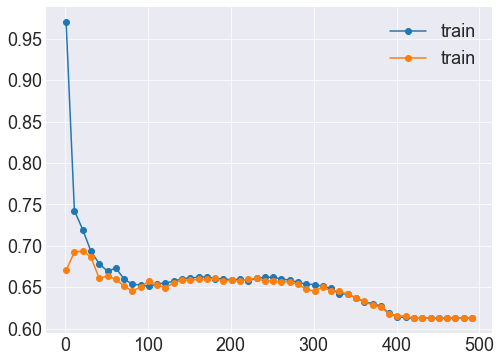

In [78]:
plt.figure(figsize=(8,6))

plt.plot(nn,np.mean(train_scores_KN,axis=1),'-o', label='train')
plt.plot(nn,np.mean(test_scores_KN,axis=1),'-o', label='train')

plt.legend()

In [90]:
kn = KNeighborsClassifier(n_neighbors=21).fit(train_data_finite, train_labels)
print("random forest score: %f" % kn.score(test_data_finite, test_labels))

random forest score: 0.704268


In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': nn}

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5, verbose=1, return_train_score=True)

In [87]:
grid.fit(train_data_finite, train_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [89]:
grid.best_score_,grid.best_params_

(0.6941896024464832, {'n_neighbors': 21})

In [92]:
param_grid = {'n_estimators': np.arange(1,20,1),
             'max_depth': np.arange(1,20,1)}

grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=1, return_train_score=True)

grid.fit(train_data_finite, train_labels)

Fitting 5 folds for each of 361 candidates, totalling 1805 fits


[Parallel(n_jobs=1)]: Done 1805 out of 1805 | elapsed:   25.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [93]:
grid.best_score_,grid.best_params_

(0.8134556574923547, {'max_depth': 7, 'n_estimators': 15})

In [94]:
rf = RandomForestClassifier(n_estimators=15, max_depth=7, random_state=0).fit(train_data_finite, train_labels)
print("random forest score: %f" % rf.score(test_data_finite, test_labels))

random forest score: 0.814024


In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
param_grid = {
    'n_estimators': np.arange(1, 20, 1),
    'max_depth': np.arange(1, 20, 1)
}

grid = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_grid,
    cv=5,
    n_iter=50,
    verbose=1,
    return_train_score=True)

grid.fit(train_data_finite, train_labels)

grid.best_score_, grid.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.6s finished


(0.8063200815494393, {'n_estimators': 15, 'max_depth': 8})

# Text Feature Extraction with Bag-of-Words

In many tasks, like in the classical spam detection, your input data is text.
Free text with variables length is very far from the fixed length numeric representation that we need to do machine learning with scikit-learn.
However, there is an easy and effective way to go from text data to a numeric representation using the so-called bag-of-words model, which provides a data structure that is compatible with the machine learning aglorithms in scikit-learn.

<img src="figures/bag_of_words.svg" width="100%">


Let's assume that each sample in your dataset is represented as one string, which could be just a sentence, an email, or a whole news article or book. To represent the sample, we first split the string into a list of tokens, which correspond to (somewhat normalized) words. A simple way to do this to just split by whitespace, and then lowercase the word. 

Then, we build a vocabulary of all tokens (lowercased words) that appear in our whole dataset. This is usually a very large vocabulary.
Finally, looking at our single sample, we could show how often each word in the vocabulary appears.
We represent our string by a vector, where each entry is how often a given word in the vocabulary appears in the string.

As each sample will only contain very few words, most entries will be zero, leading to a very high-dimensional but sparse representation.

The method is called "bag-of-words," as the order of the words is lost entirely.

In [109]:
X = ["Some say the world will end in fire,",
     "Some say in ice."]

In [110]:
len(X)

2

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [112]:
vectorizer.vocabulary_

{'some': 5,
 'say': 4,
 'the': 6,
 'world': 8,
 'will': 7,
 'end': 0,
 'in': 3,
 'fire': 1,
 'ice': 2}

In [113]:
X_bag_of_words = vectorizer.transform(X)

In [114]:
X_bag_of_words.shape

(2, 9)

In [115]:
X_bag_of_words

<2x9 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [116]:
X_bag_of_words.toarray()

array([[1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 0]])

In [117]:
vectorizer.get_feature_names()

['end', 'fire', 'ice', 'in', 'say', 'some', 'the', 'will', 'world']

In [118]:
vectorizer.inverse_transform(X_bag_of_words)

[array(['end', 'fire', 'in', 'say', 'some', 'the', 'will', 'world'],
       dtype='<U5'), array(['ice', 'in', 'say', 'some'], dtype='<U5')]

# tf-idf Encoding
A useful transformation that is often applied to the bag-of-word encoding is the so-called term-frequency inverse-document-frequency (tf-idf) scaling, which is a non-linear transformation of the word counts.

The tf-idf encoding rescales words that are common to have less weight:

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [120]:
import numpy as np
np.set_printoptions(precision=2)

print(tfidf_vectorizer.transform(X).toarray())

[[0.39 0.39 0.   0.28 0.28 0.28 0.39 0.39 0.39]
 [0.   0.   0.63 0.45 0.45 0.45 0.   0.   0.  ]]


tf-idfs are a way to represent documents as feature vectors. tf-idfs can be understood as a modification of the raw term frequencies (`tf`); the `tf` is the count of how often a particular word occurs in a given document. The concept behind the tf-idf is to downweight terms proportionally to the number of documents in which they occur. Here, the idea is that terms that occur in many different documents are likely unimportant or don't contain any useful information for Natural Language Processing tasks such as document classification. If you are interested in the mathematical details and equations, see this [external IPython Notebook](http://nbviewer.jupyter.org/github/rasbt/pattern_classification/blob/master/machine_learning/scikit-learn/tfidf_scikit-learn.ipynb) that walks you through the computation.

# Bigrams and N-Grams

In the example illustrated in the figure at the beginning of this notebook, we used the so-called 1-gram (unigram) tokenization: Each token represents a single element with regard to the splittling criterion. 

Entirely discarding word order is not always a good idea, as composite phrases often have specific meaning, and modifiers like "not" can invert the meaning of words.

A simple way to include some word order are n-grams, which don't only look at a single token, but at all pairs of neighborhing tokens. For example, in 2-gram (bigram) tokenization, we would group words together with an overlap of one word; in 3-gram (trigram) splits we would create an overlap two words, and so forth:

- original text: "this is how you get ants"
- 1-gram: "this", "is", "how", "you", "get", "ants"
- 2-gram: "this is", "is how", "how you", "you get", "get ants"
- 3-gram: "this is how", "is how you", "how you get", "you get ants"

Which "n" we choose for "n-gram" tokenization to obtain the optimal performance in our predictive model depends on the learning algorithm, dataset, and task. Or in other words, we have consider "n" in "n-grams" as a tuning parameters, and in later notebooks, we will see how we deal with these.

Now, let's create a bag of words model of bigrams using scikit-learn's `CountVectorizer`:

In [121]:
# look at sequences of tokens of minimum length 2 and maximum length 2
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [124]:
X

['Some say the world will end in fire,', 'Some say in ice.']

In [122]:
bigram_vectorizer.get_feature_names()

['end in',
 'in fire',
 'in ice',
 'say in',
 'say the',
 'some say',
 'the world',
 'will end',
 'world will']

In [123]:
bigram_vectorizer.transform(X).toarray()

array([[1, 1, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 0]])

Often we want to include unigrams (single tokens) AND bigrams, wich we can do by passing the following tuple as an argument to the `ngram_range` parameter of the `CountVectorizer` function:

In [125]:
gram_vectorizer = CountVectorizer(ngram_range=(1, 2))
gram_vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [126]:
gram_vectorizer.get_feature_names()

['end',
 'end in',
 'fire',
 'ice',
 'in',
 'in fire',
 'in ice',
 'say',
 'say in',
 'say the',
 'some',
 'some say',
 'the',
 'the world',
 'will',
 'will end',
 'world',
 'world will']

In [127]:
gram_vectorizer.transform(X).toarray()

array([[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]])

Character n-grams
=================

Sometimes it is also helpful not only to look at words, but to consider single characters instead.   
That is particularly useful if we have very noisy data and want to identify the language, or if we want to predict something about a single word.
We can simply look at characters instead of words by setting ``analyzer="char"``.
Looking at single characters is usually not very informative, but looking at longer n-grams of characters could be:

In [128]:
X

['Some say the world will end in fire,', 'Some say in ice.']

In [129]:
char_vectorizer = CountVectorizer(ngram_range=(2, 2), analyzer="char")
char_vectorizer.fit(X)

CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [130]:
print(char_vectorizer.get_feature_names())

[' e', ' f', ' i', ' s', ' t', ' w', 'ay', 'ce', 'd ', 'e ', 'e,', 'e.', 'en', 'fi', 'he', 'ic', 'il', 'in', 'ir', 'l ', 'ld', 'll', 'me', 'n ', 'nd', 'om', 'or', 're', 'rl', 'sa', 'so', 'th', 'wi', 'wo', 'y ']


In [131]:
zen = """Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!"""

In [132]:
text = zen.split("\n")

In [158]:
for n in [2, 3, 4]:
    cv = CountVectorizer(ngram_range=(n, n)).fit(text)
    counts = cv.transform(text)
    most_common = np.argmax(counts.sum(axis=0))
    print("most common %d-gram: %s" % (n, cv.get_feature_names()[most_common]))

most common 2-gram: better than
most common 3-gram: is better than
most common 4-gram: if the implementation is


# Case Study - Text classification for SMS spam detection

We first load the text data from the `dataset` directory that should be located in your notebooks directory, which we created by running the `fetch_data.py` script from the top level of the GitHub repository.

Furthermore, we perform some simple preprocessing and split the data array into two parts:

1. `text`: A list of lists, where each sublists contains the contents of our emails
2. `y`: our SPAM vs HAM labels stored in binary; a 1 represents a spam message, and a 0 represnts a ham (non-spam) message. 

In [2]:
import os

with open(os.path.join("datasets", "smsspam", "SMSSpamCollection")) as f:
    lines = [line.strip().split("\t") for line in f.readlines()]

text = [x[1] for x in lines]
y = [int(x[0] == "spam") for x in lines]

In [3]:
text[:10]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, $1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea $900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [4]:
y[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [5]:
print('Number of ham and spam messages:', np.bincount(y))

Number of ham and spam messages: [4827  747]


In [6]:
type(text)

list

In [7]:
type(y)

list

Next, we split our dataset into 2 parts, the test and training dataset:

In [8]:
from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y, 
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)

Now, we use the CountVectorizer to parse the text data into a bag-of-words model.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

print('CountVectorizer defaults')
CountVectorizer()

CountVectorizer defaults


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
vectorizer = CountVectorizer()
vectorizer.fit(text_train)

X_train = vectorizer.transform(text_train)
X_test = vectorizer.transform(text_test)

In [11]:
print(len(vectorizer.vocabulary_))

7453


In [12]:
X_train.shape

(4180, 7453)

In [13]:
print(vectorizer.get_feature_names()[2000:2020])

['crammed', 'cramps', 'crap', 'crash', 'crashed', 'crashing', 'crave', 'craving', 'craziest', 'crazy', 'crazyin', 'crckt', 'cream', 'created', 'creative', 'credit', 'credited', 'credits', 'creep', 'creepy']


In [14]:
print(X_train.shape)
print(X_test.shape)

(4180, 7453)
(1394, 7453)


### Training a Classifier on Text Features

We can now train a classifier, for instance a logistic regression classifier, which is a fast baseline for text classification tasks:

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We can now evaluate the classifier on the testing set. Let's first use the built-in score function, which is the rate of correct classification in the test set:

In [17]:
clf.score(X_test, y_test)

0.9849354375896701

We can also compute the score on the training set to see how well we do there:

In [18]:
clf.score(X_train, y_train)

0.9983253588516746

In [19]:
import pandas as pd

In [20]:
coefs = pd.DataFrame()
coefs['word'] = np.asarray(vectorizer.get_feature_names())
coefs['value'] = clf.coef_.ravel()

In [202]:
coefs.sort_values(by='value')

,word,value
3184,gt,-1.016851
4126,lt,-0.963430
4274,me,-0.840544
4516,my,-0.839291
3282,he,-0.720931
4038,ll,-0.714177
5952,sir,-0.702672
6094,sorry,-0.695100
920,am,-0.680428
1540,but,-0.668099


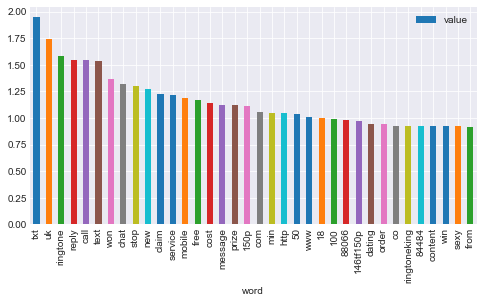

In [34]:
coefs[coefs['value']>0.9].sort_values('value',ascending=False).plot(kind='bar',y='value',x='word',figsize=(8,4))

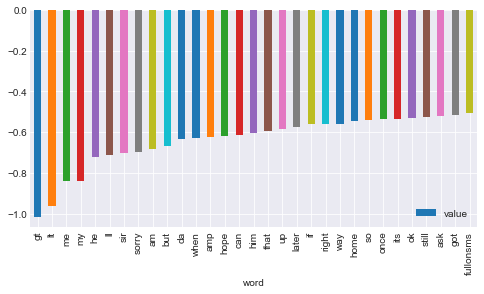

In [41]:
coefs[coefs['value']<-0.5].sort_values('value',ascending=True).plot(kind='bar',y='value',x='word',figsize=(8,4))

In [42]:
from sklearn.dummy import DummyClassifier

In [46]:
d_clf = DummyClassifier()
d_clf.fit(X_train, y_train)
d_clf.score(X_test, y_test)

0.7647058823529411

In [47]:
d_clf = DummyClassifier("most_frequent")
d_clf.fit(X_train, y_train)
d_clf.score(X_test, y_test)

0.8658536585365854